In [1]:
! pip install -q kaggle

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hamzaghraoui","key":"158857fab4ed7f9e5a7ace4ea4aeee62"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d shanmukh05/music-classification

100% 7.86G/7.86G [04:22<00:00, 33.1MB/s]
100% 7.86G/7.86G [04:22<00:00, 32.1MB/s]


In [6]:
! mkdir data

In [7]:
! unzip music-classification.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/dataset/happy/18652.wav  
  inflating: data/dataset/happy/18653.wav  
  inflating: data/dataset/happy/18654.wav  
  inflating: data/dataset/happy/18655.wav  
  inflating: data/dataset/happy/18656.wav  
  inflating: data/dataset/happy/18657.wav  
  inflating: data/dataset/happy/18658.wav  
  inflating: data/dataset/happy/18659.wav  
  inflating: data/dataset/happy/18660.wav  
  inflating: data/dataset/happy/18661.wav  
  inflating: data/dataset/happy/18662.wav  
  inflating: data/dataset/happy/18663.wav  
  inflating: data/dataset/happy/18664.wav  
  inflating: data/dataset/happy/18665.wav  
  inflating: data/dataset/happy/18666.wav  
  inflating: data/dataset/happy/18667.wav  
  inflating: data/dataset/happy/18668.wav  
  inflating: data/dataset/happy/18669.wav  
  inflating: data/dataset/happy/18670.wav  
  inflating: data/dataset/happy/18671.wav  
  inflating: data/dataset/happy/18672.wav  
  inflating: data/dataset

In [3]:
import os
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
import json
import math

In [2]:
dir_ = 'data'
print(list(os.listdir(f'{dir_}/dataset/')))

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data/dataset/'

In [10]:
signal, sample_rate = librosa.load(f'{dir_}/dataset/aggressive/6761.wav')

print('signal:', signal, '\n')
print('signal shape:', np.shape(signal), '\n')
print('Sample Rate (KHz):', sample_rate, '\n')

print('Check Len of Audio:', 110250/22050)

signal: [-4.7441808e-06 -4.9303931e-06  1.6592643e-06 ... -1.5482524e-02
 -1.2991546e-02 -3.7497155e-02] 

signal shape: (110250,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 5.0


In [11]:
audio, _ = librosa.effects.trim(signal)

print('Audio File:', audio, '\n')
print('Audio File shape:', np.shape(audio))

Audio File: [-4.7441808e-06 -4.9303931e-06  1.6592643e-06 ... -1.5482524e-02
 -1.2991546e-02 -3.7497155e-02] 

Audio File shape: (110250,)


In [12]:
FIG_SIZE = (16,8)

Text(0.5, 1.0, 'Example Sound Waves on Aggressive')

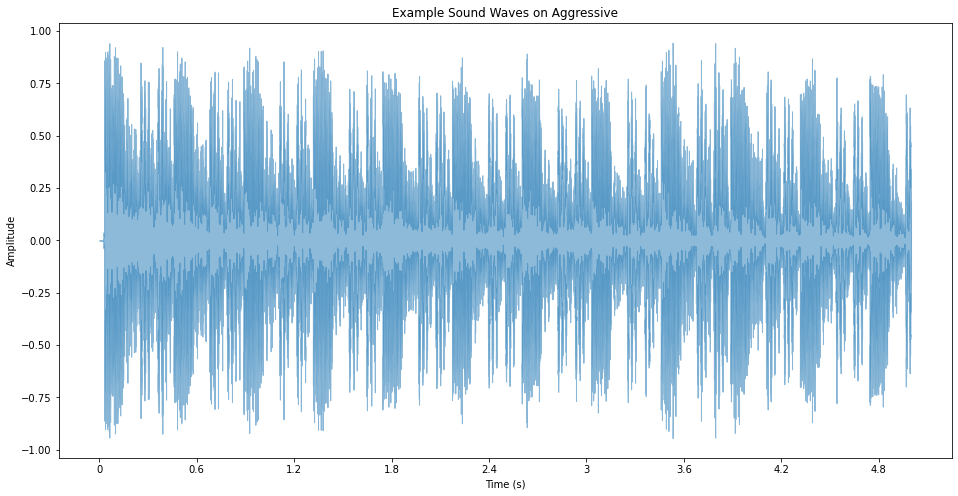

In [13]:
# WAVEFORM
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(signal, sample_rate, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Example Sound Waves on Aggressive")

In [14]:
# Fourier Transform (FFT) - Frequency Domain
fft = np.fft.fft(signal)

In [15]:
# Calculate the Magnitude (abs values on complex numbers)
spectrum = np.abs(fft)

In [16]:
# Create the Frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

Text(0.5, 1.0, 'Power Spectrum')

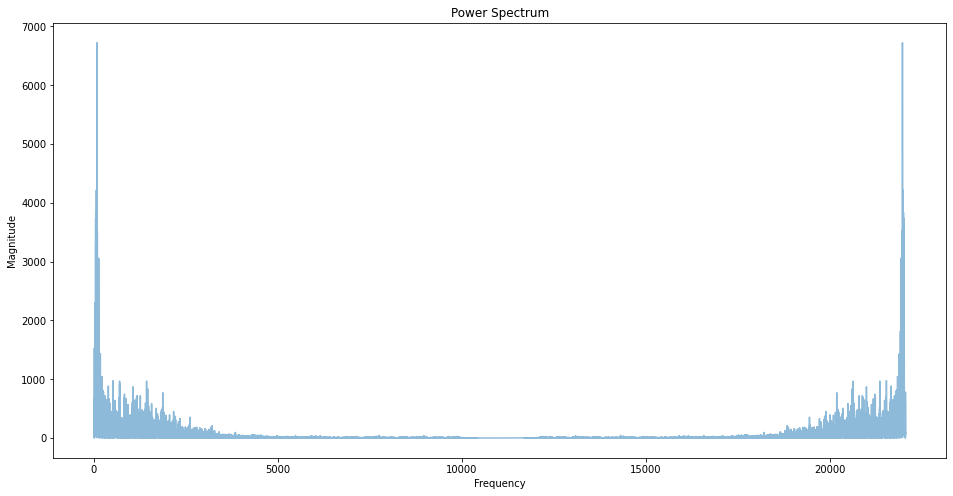

In [17]:
# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(f, spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [18]:
# Take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

Text(0.5, 1.0, 'Power Spectrum')

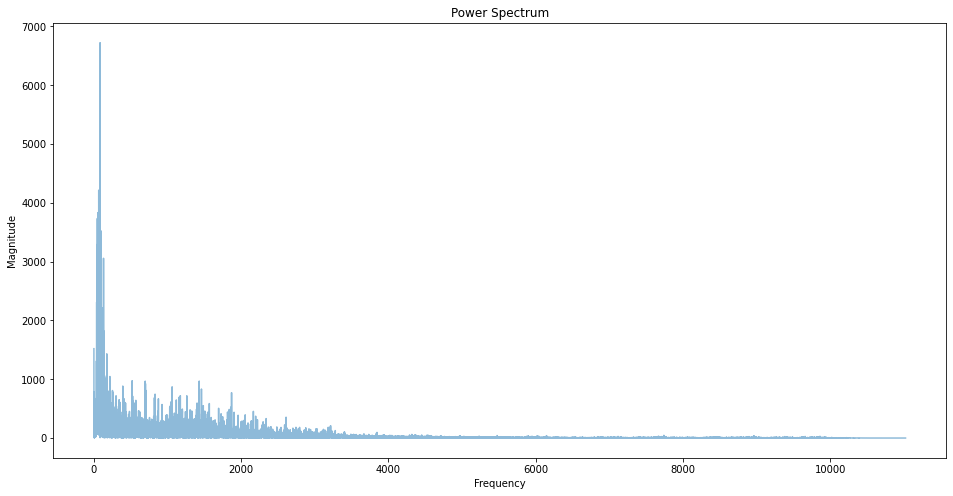

In [19]:
# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [21]:
# Spectrogram (STFT)
hop_length = 512 # num. of samples
n_fft = 2048 # num. of samples for window

In [22]:
# Perform STFT
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

In [23]:
# Calculate the Magnitude (abs values on complex numbers)
spectrogram = np.abs(stft)

Text(0.5, 1.0, 'Spectrogram')

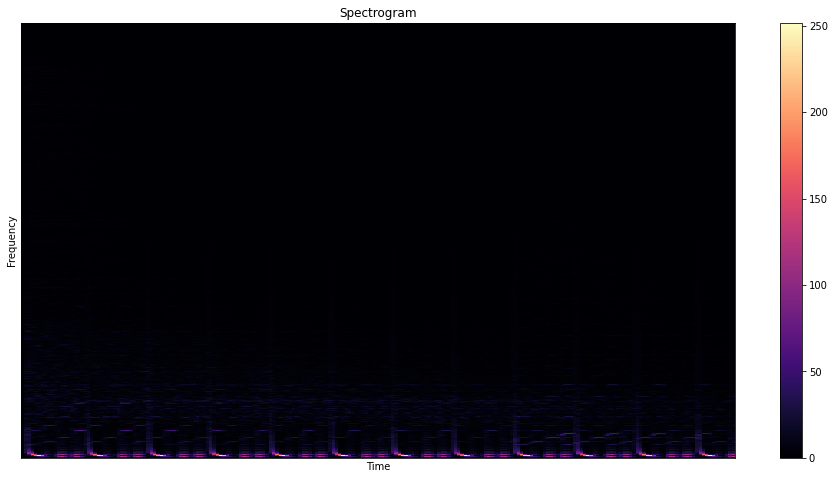

In [24]:
# Plot the Spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

In [25]:
# Apply Logarithm to get values in Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

Text(0.5, 1.0, 'Spectrogram (dB)')

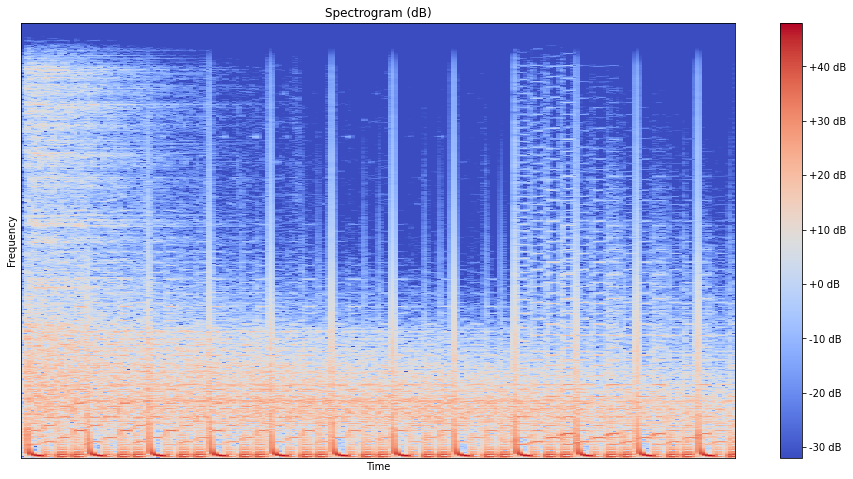

In [26]:
# Plot the Spectrogram in Decibels
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length )
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

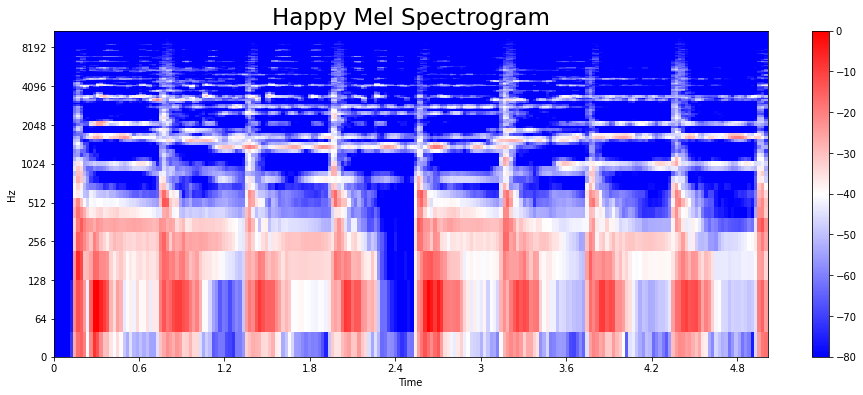

In [27]:
signal, sample_rate = librosa.load(f'{dir_}/dataset/happy/17861.wav')
# singal, z = librosa.effects.trim(signal)


mel = librosa.feature.melspectrogram(signal, sr=sample_rate)
mel_db = librosa.amplitude_to_db(mel, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(mel_db, sr=sample_rate, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'bwr');
plt.colorbar();
plt.title("Happy Mel Spectrogram", fontsize = 23);

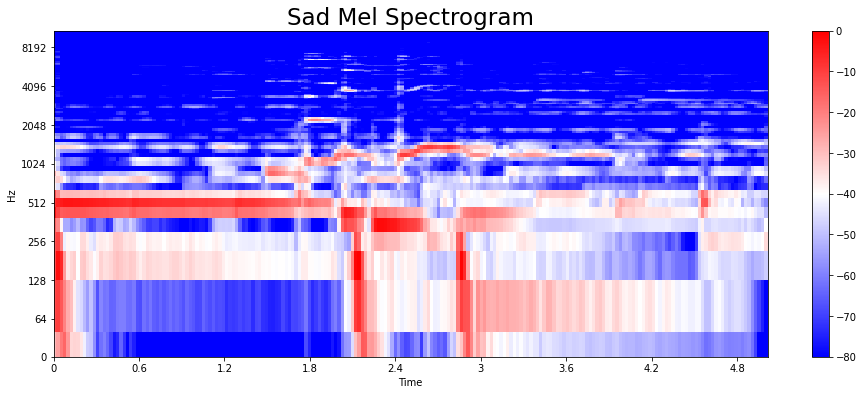

In [28]:
signal, sample_rate = librosa.load(f'{dir_}/dataset/sad/10007.wav')
# signal, z = librosa.effects.trim(y)


mel = librosa.feature.melspectrogram(signal, sr=sample_rate)
mel_db = librosa.amplitude_to_db(mel, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(mel_db, sr=sample_rate, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'bwr');
plt.colorbar();
plt.title("Sad Mel Spectrogram", fontsize = 23);

In [29]:
# MFCCs (we use 13 MFCCs)
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

Text(0.5, 1.0, 'MFCCs')

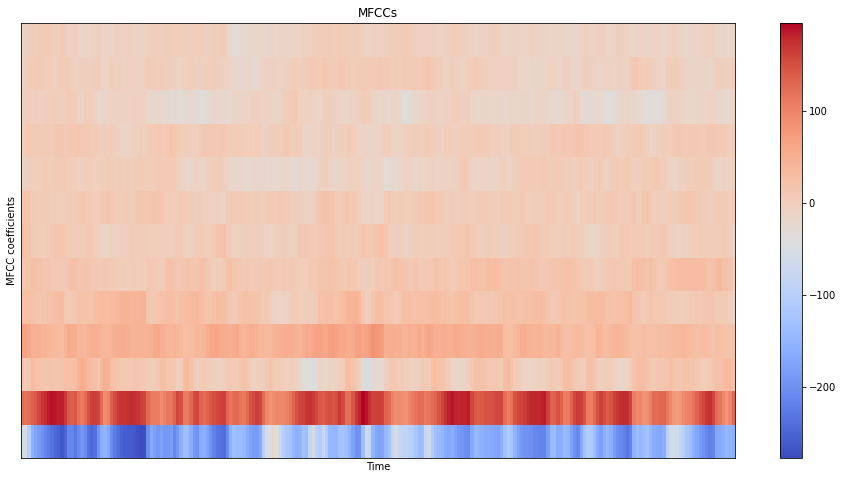

In [30]:
# Plot MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

In [89]:
DATASET_PATH = "data/dataset"
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 5 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [90]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along with genre labels.
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:


                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [91]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)

Streaming output truncated to the last 5000 lines.
data/dataset/dramatic/16485.wav, segment:1
data/dataset/dramatic/16485.wav, segment:2
data/dataset/dramatic/16485.wav, segment:3
data/dataset/dramatic/16485.wav, segment:4
data/dataset/dramatic/16485.wav, segment:5
data/dataset/dramatic/16485.wav, segment:6
data/dataset/dramatic/16485.wav, segment:7
data/dataset/dramatic/16485.wav, segment:8
data/dataset/dramatic/16485.wav, segment:9
data/dataset/dramatic/16485.wav, segment:10
data/dataset/dramatic/14389.wav, segment:1
data/dataset/dramatic/14389.wav, segment:2
data/dataset/dramatic/14389.wav, segment:3
data/dataset/dramatic/14389.wav, segment:4
data/dataset/dramatic/14389.wav, segment:5
data/dataset/dramatic/14389.wav, segment:6
data/dataset/dramatic/14389.wav, segment:7
data/dataset/dramatic/14389.wav, segment:8
data/dataset/dramatic/14389.wav, segment:9
data/dataset/dramatic/14389.wav, segment:10
data/dataset/dramatic/15231.wav, segment:1
data/dataset/dramatic/15231.wav, segment:2
d

In [4]:
import json
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import random

import librosa
import math

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization 
from keras.optimizers import Adam
from keras import regularizers
import keras

In [2]:
# path to json
DATA_PATH = "data_10.json"

In [3]:
def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

In [4]:
# load data
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [5]:
X.shape

(9986, 130, 13)

In [6]:
X.shape[1]

130

In [7]:
X.shape[2]

13

# Convolution Neural Network

In [99]:
# create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [100]:
X_train.shape

(60797, 22, 13, 1)

In [102]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [107]:
model_cnn = Sequential()

model_cnn.add(Conv2D(128 , (3 , 3) , activation = 'relu', input_shape = input_shape))
model_cnn.add(MaxPooling2D((3 , 3) , strides = (2 , 2) , padding = 'same'))
model_cnn.add(BatchNormalization())

model_cnn.add(Conv2D(64 , (3 , 3) , activation = 'relu'))
model_cnn.add(MaxPooling2D((3 , 3) , strides = (2 , 2) , padding = 'same'))
model_cnn.add(BatchNormalization())

model_cnn.add(Conv2D(32 , (2 , 2) , activation = 'relu'))
model_cnn.add(MaxPooling2D((2 , 2) , strides = (2 , 2) , padding = 'same'))
model_cnn.add(BatchNormalization())

model_cnn.add(Flatten())

model_cnn.add(Dense(64 , activation = 'relu'))
model_cnn.add(Dropout(0.3))

model_cnn.add(Dense(5 , activation = 'softmax'))

In [108]:
model_cnn.compile(loss = 'sparse_categorical_crossentropy' , optimizer = Adam(learning_rate =0.0001) , metrics = ['accuracy'])

In [109]:
model_cnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 20, 11, 128)       1280      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 10, 6, 128)       0         
 g2D)                                                            
                                                                 
 batch_normalization_21 (Bat  (None, 10, 6, 128)       512       
 chNormalization)                                                
                                                                 
 conv2d_22 (Conv2D)          (None, 8, 4, 64)          73792     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 4, 2, 64)         0         
 g2D)                                                            
                                                      

In [110]:
history = model_cnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=64, epochs=200)


Epoch 1/200
950/950 [==============================] - 6s 6ms/step - loss: 1.5461 - accuracy: 0.3180 - val_loss: 1.3894 - val_accuracy: 0.3974
Epoch 2/200
950/950 [==============================] - 5s 5ms/step - loss: 1.3882 - accuracy: 0.4021 - val_loss: 1.3142 - val_accuracy: 0.4488
Epoch 3/200
950/950 [==============================] - 5s 5ms/step - loss: 1.3080 - accuracy: 0.4449 - val_loss: 1.2522 - val_accuracy: 0.4776
Epoch 4/200
950/950 [==============================] - 5s 5ms/step - loss: 1.2478 - accuracy: 0.4779 - val_loss: 1.1988 - val_accuracy: 0.5019
Epoch 5/200
950/950 [==============================] - 5s 5ms/step - loss: 1.1932 - accuracy: 0.5060 - val_loss: 1.1529 - val_accuracy: 0.5192
Epoch 6/200
950/950 [==============================] - 5s 5ms/step - loss: 1.1424 - accuracy: 0.5293 - val_loss: 1.1180 - val_accuracy: 0.5403
Epoch 7/200
950/950 [==============================] - 5s 5ms/step - loss: 1.1004 - accuracy: 0.5478 - val_loss: 1.0596 - val_accuracy: 0.5621

In [112]:
def plot_curves(history):

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.figure(figsize=(15,5))

    #plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label = "training_loss")
    plt.plot(epochs, val_loss, label = "val_loss")
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.legend()

    #plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label = "training_accuracy")
    plt.plot(epochs, val_accuracy, label = "val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.legend()

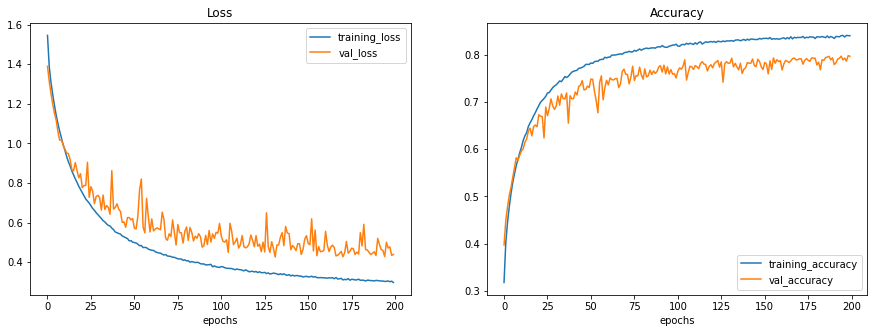

In [113]:
plot_curves(history)

In [114]:
# evaluate model on Test Set
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

792/792 - 2s - loss: 0.4610 - accuracy: 0.7913 - 2s/epoch - 2ms/step

Test accuracy: 0.7912998795509338


In [115]:
model_cnn.save('Music_Mood_Classification_CNN')

In [116]:
model_cnn.save("Music_Mood_5_CNN.h5")

In [5]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("Music_Mood_5_CNN.h5")

In [6]:
mood_dict = {0:"aggressive",1:"dramatic",2:"happy",3:"romantic",4:"sad"}

In [19]:
# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]  

NameError: name 'X_test' is not defined

In [118]:
X_to_predict.shape

(22, 13, 1)

In [119]:
print("Real Mood:", y_to_predict)

Real Mood: 3


In [120]:
# add a dimension to input data for sample - model.predict() expects a 4d array in this case
X_to_predict = X_to_predict[np.newaxis, ...] # array shape (1, 130, 13, 1)

In [121]:
X_to_predict.shape

(1, 22, 13, 1)

In [122]:
# perform prediction
prediction = model_cnn.predict(X_to_predict)



1/1 [==============================] - 0s 178ms/step


In [126]:
# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Mood:", mood_dict[int(predicted_index)])

Predicted Mood: romantic


In [128]:
# pick a sample to predict from the test set
X_to_predict = X_test[50]
y_to_predict = y_test[50]


print("Real Mood:",mood_dict[int(y_to_predict)])

X_to_predict = X_to_predict[np.newaxis, ...]

prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Mood:", mood_dict[int(predicted_index)])

Real Mood: sad
1/1 [==============================] - 0s 18ms/step
Predicted Mood: sad


In [129]:
len(X_test)

25333

In [20]:
for n in range(10):

  i = random.randint(0,len(X_test))
  # pick a sample to predict from the test set
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]

  print("\nReal Mood:", mood_dict[int(y_to_predict)])

  X_to_predict = X_to_predict[np.newaxis, ...]

  prediction = model_cnn.predict(X_to_predict)

  # get index with max value
  predicted_index = np.argmax(prediction, axis=1)

  print("Predicted Mood:", mood_dict[int(predicted_index)])

NameError: name 'X_test' is not defined

In [7]:
# Audio files pre-processing
def process_input(audio_file, track_duration):

  SAMPLE_RATE = 22050
  NUM_MFCC = 13
  N_FTT=2048
  HOP_LENGTH=512
  TRACK_DURATION = track_duration # measured in seconds
  SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
  NUM_SEGMENTS = 10

  samples_per_segment = int(SAMPLES_PER_TRACK / NUM_SEGMENTS)
  num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / HOP_LENGTH)

  signal, sample_rate = librosa.load(audio_file, sr=SAMPLE_RATE)
  
  for d in range(10):

    # calculate start and finish sample for current segment
    start = samples_per_segment * d
    finish = start + samples_per_segment

    # extract mfcc
    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=NUM_MFCC, n_fft=N_FTT, hop_length=HOP_LENGTH)
    mfcc = mfcc.T

    return mfcc

In [8]:
new_input_mfcc = process_input("08 - Mantis Lords.mp3",5 )

C:\Users\TUF\AppData\Local\Temp\ipykernel_12148\3728867700.py:24: FutureWarning: Pass y=[0.00083833 0.00025597 0.00113567 ... 0.11507919 0.13715604 0.15769231], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=NUM_MFCC, n_fft=N_FTT, hop_length=HOP_LENGTH)


In [41]:
type(new_input_mfcc)


numpy.ndarray

In [42]:
new_input_mfcc.shape


(22, 13)

In [9]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape

(1, 22, 13, 1)

In [10]:
prediction = reconstructed_model.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Mood:", mood_dict[int(predicted_index)])

1/1 [==============================] - 4s 4s/step
Predicted Mood: aggressive


In [11]:
new_input_mfcc = process_input("lovely.mp3", 5)

C:\Users\TUF\AppData\Local\Temp\ipykernel_12148\3728867700.py:24: FutureWarning: Pass y=[ 2.8250364e-11 -2.2928753e-11  5.1645650e-12 ...  2.2620340e-07
  2.5904455e-07 -5.4962237e-07], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=NUM_MFCC, n_fft=N_FTT, hop_length=HOP_LENGTH)


In [12]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape

(1, 22, 13, 1)

In [14]:
prediction = reconstructed_model.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Mood:", mood_dict[int(predicted_index)])

1/1 [==============================] - 0s 21ms/step
Predicted Mood: dramatic


In [15]:
new_input_mfcc = process_input("Take Me To Church .mp3", 5)

C:\Users\TUF\AppData\Local\Temp\ipykernel_12148\3728867700.py:24: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=NUM_MFCC, n_fft=N_FTT, hop_length=HOP_LENGTH)


In [16]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape

(1, 22, 13, 1)

In [29]:
prediction = reconstructed_model.predict(X_to_predict)

# get index with max 


predicted_index = np.argmax(prediction, axis=1)

print("Predicted Mood:", mood_dict[int(predicted_index)])

1/1 [==============================] - 0s 20ms/step
Predicted Mood: dramatic


In [30]:
new_input_mfcc = process_input("/content/data/dataset/aggressive/6789.wav", 5)

C:\Users\TUF\anaconda3\envs\tf\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


FileNotFoundError: [Errno 2] No such file or directory: '/content/data/dataset/aggressive/6789.wav'

In [183]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape

(1, 22, 13, 1)

In [184]:
prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Mood:", mood_dict[int(predicted_index)])

1/1 [==============================] - 0s 41ms/step
Predicted Mood: happy
